# Comparison of parameters for jet tagging in fast sim and full sim

Here I use CLD also for FastSim and use more data for FullSim for better statistics


In [1]:
save_status = False # save all histograms!

In [2]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
#path_fullsim = "/home/saaumill/FullSimTagger/src/Hbb_fullsim_tree.root"
path_fullsim = "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_input/hadded/Htautau.root"
path_fastsim = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/samples_v5/CLD_240/stage2_Htautau.root"

file_fu = uproot.open(path_fullsim)
tree_fu = file_fu["tree;1"]

file_fa = uproot.open(path_fastsim)
tree_fa = file_fa["tree;1"]

In [27]:
df_fa = tree_fa.arrays(library="np", entry_start=0, entry_stop=150000) #entry_start=0, entry_stop=200, 
df_fu = tree_fu.arrays(library="np", entry_start=0, entry_stop=150000)

In [28]:
bool(1)

True

**Task:** Plot spectrum of full vs fast sim spectrum electron vs muon for |cos theta | < 0.9

In [29]:
from functools import reduce

In [30]:
fa_ind_el = np.where(np.concatenate(df_fa["pfcand_isEl"])==1)
fa_ind_mu = np.where(np.concatenate(df_fa["pfcand_isMu"])==1)
fa_ind_gamma = np.where(np.concatenate(df_fa["pfcand_type"])==22)

fu_ind_gamma = np.where(np.concatenate(df_fu["pfcand_type"])==22)
fu_ind_el = np.where(abs(np.concatenate(df_fu["pfcand_type"]))==11)
fu_ind_mu = np.where(abs(np.concatenate(df_fu["pfcand_type"]))==13)

In [31]:
fa_ind_thetacut = np.where(abs(np.cos(np.concatenate(df_fa["pfcand_theta"])))<0.9)
fu_ind_thetacut = np.where(abs(np.cos(np.concatenate(df_fu["pfcand_theta"])))<0.9)

In [32]:
np.unique(np.concatenate(df_fa["pfcand_type"]))

array([  0.,  22., 130.], dtype=float32)

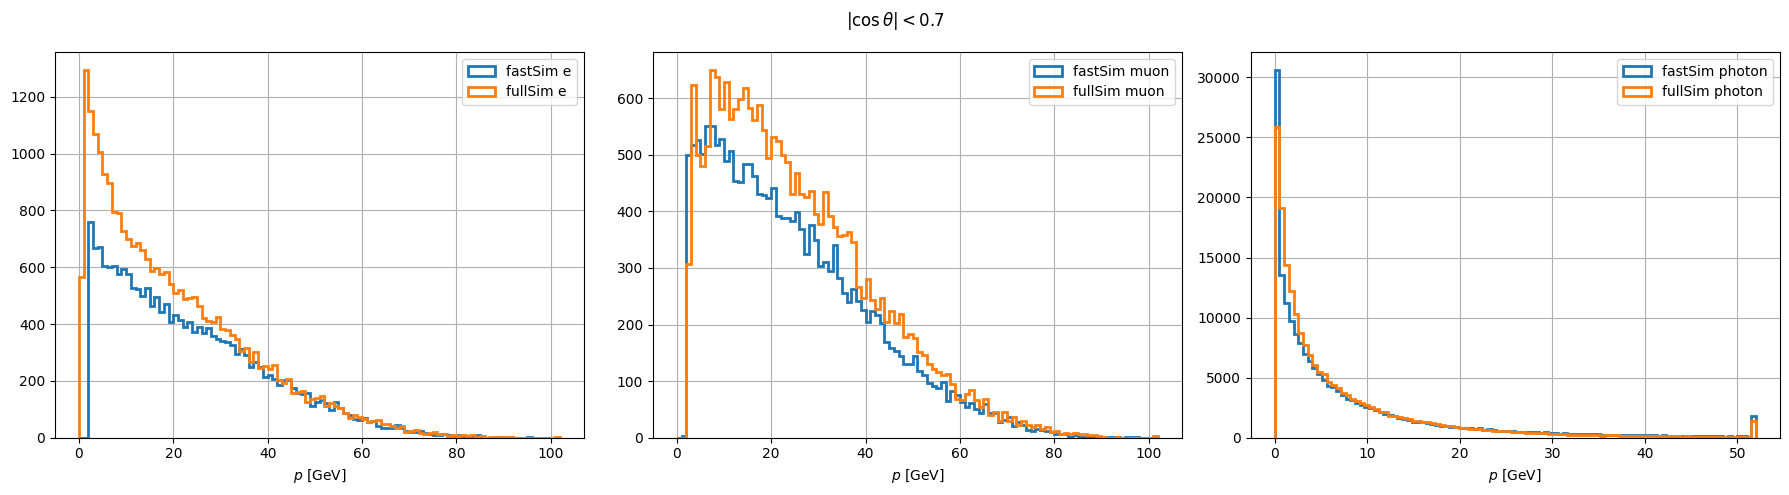

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
index_fa_xtype = [fa_ind_el, fa_ind_mu, fa_ind_gamma]
index_fu_xtype = [fu_ind_el, fu_ind_mu, fu_ind_gamma]
ranges = [(0, 100), (0, 100), (0, 50)]
overflow_bins = [(0, 102), (0, 102), (0, 52)]  # Include overflow bins
fig.suptitle(r"$|\cos\theta|<0.9$")
for i, xtype in enumerate(["e", "muon", "photon"]):
    ind_fa = reduce(np.intersect1d, [index_fa_xtype[i], fa_ind_thetacut])
    ind_fu = reduce(np.intersect1d, [index_fu_xtype[i], fu_ind_thetacut])
    
    fa_p = np.concatenate(df_fa["pfcand_p"])[ind_fa]
    fu_p = np.concatenate(df_fu["pfcand_p"])[ind_fu]

    # Create new arrays with overflow bins
    fa_p_with_overflow = np.clip(fa_p, overflow_bins[i][0], overflow_bins[i][1] - 1e-5)
    fu_p_with_overflow = np.clip(fu_p, overflow_bins[i][0], overflow_bins[i][1] - 1e-5)

    ax[i].hist(fa_p_with_overflow, bins=102, histtype="step", range=overflow_bins[i], linewidth=2.0, label=f"fastSim {xtype}")
    ax[i].hist(fu_p_with_overflow, bins=102, histtype="step", range=overflow_bins[i], linewidth=2.0, label=f"fullSim {xtype}")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel(f"$p$ [GeV]")

plt.tight_layout()
plt.show()

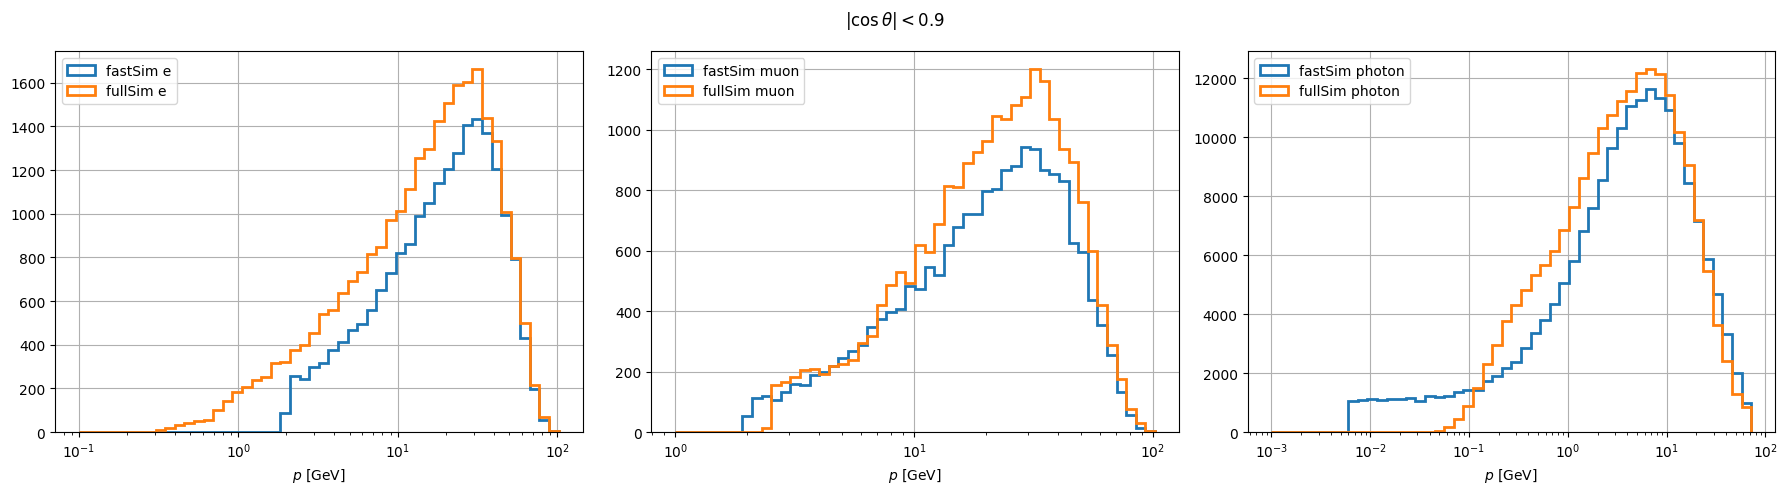

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
index_fa_xtype = [fa_ind_el, fa_ind_mu, fa_ind_gamma]
index_fu_xtype = [fu_ind_el, fu_ind_mu, fu_ind_gamma]
ranges = [(0.1, 100), (1, 100), (0.001, 70)]  # Logarithmic scale starts from a positive value > 0
overflow_bins = [(0.1, 102), (1, 102), (0.001, 72)]  # Include overflow bins
bins = 50

fig.suptitle(r"$|\cos\theta|<0.9$")
for i, xtype in enumerate(["e", "muon", "photon"]):
    ind_fa = reduce(np.intersect1d, [index_fa_xtype[i], fa_ind_thetacut])
    ind_fu = reduce(np.intersect1d, [index_fu_xtype[i], fu_ind_thetacut])
    
    fa_p = np.concatenate(df_fa["pfcand_p"])[ind_fa]
    fu_p = np.concatenate(df_fu["pfcand_p"])[ind_fu]

    # Create new arrays with overflow bins
    fa_p_with_overflow = np.clip(fa_p, overflow_bins[i][0], overflow_bins[i][1] - 1e-5)
    fu_p_with_overflow = np.clip(fu_p, overflow_bins[i][0], overflow_bins[i][1] - 1e-5)

    # Define logarithmic bins
    log_bins = np.logspace(np.log10(overflow_bins[i][0]), np.log10(overflow_bins[i][1]), bins + 1)

    ax[i].hist(fa_p_with_overflow, bins=log_bins, histtype="step", linewidth=2.0, label=f"fastSim {xtype}")
    ax[i].hist(fu_p_with_overflow, bins=log_bins, histtype="step", linewidth=2.0, label=f"fullSim {xtype}")
    ax[i].set_xscale('log')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xlabel(f"$p$ [GeV]")

plt.tight_layout()
plt.show()